`StarHotel Customer Churn Analysis`

`October 2025`

This report presents a comprehensive analysis of customer churn for StarHotel, aiming to identify key factors contributing to customer attrition and provide actionable insights to enhance customer retention strategies.

`Any questions, please reach out!`

Chiawei Wang\
Data Scientist\
<chiawei.w@outlook.com>

[Table of Contents](#table-of-contents)
1. [Executive Summary](#Executive-Summary)
   - [Background](#Background)
   - [Approach](#Approach)
   - [Solution](#Solution)
   - [Key Insights and Strategic Recommendations](#Key-insights-and-strategic-recommendations)
2. [Planning Stage](#Planning-Stage)
   - [Description of Variables](#Description-of-variables)
   - [Understanding Data](#Understanding-data)
3. [Analysing Stage](#Analysing-Stage)
   - [Exploratory Data Analysis, Data Preprocessing, and Feature Engineering](#Exploratory-data-analysis,-data-preprocessing,-and-feature-engineering)
4. [Constructing Stage](#Constructing-Stage)
   - [Model Selection](#Model-selection)
      - [Logistic Regression Model](#logistic-regression-model)
      - [Decision Tree Model](#decision-tree-model)
      - [Random Forest Model](#random-forest-model)
      - [XGBoost Model](#xgboost-model)
5. [Executing Stage](#Executing-Stage)
   - [Conclusion](#Conclusion)

# Executive Summary

## Background

Having observed a high rate of customers failing to rebook within 6 months of their last stay, Hotels.com seeks to understand the main drivers of customer churn and identify actionable strategies to reduce attrition.

## Approach

- Assess which customer and booking factors most strongly influence churn, using statistical and machine learning techniques
- Build predictive models to identify customers at high risk of churning
- Summarize findings and recommendations for churn reduction in a presentation for Hotels.com leadership

## Solution

We employed four statistical and machine learning models, including Logistic Regression, Decision Tree, Random Forest, and XGBoost, to predict customer churn. Feature importance analysis was conducted to identify key factors influencing churn behavior, enabling data-driven decision-making for customer retention strategies. The XGBoost model emerged as the most effective, with a cross-validated ROC AUC of 0.874. A churn predictor will be built into the CRM system to enable real-time risk scoring and targeted interventions.

## Key Insights and Strategic Recommendations

| Area | Key Insight | Strategic Recommendation |
|------|-------------|--------------------------|
| Recency | **Time Since Last Booking is Critical:** Customers who do not receive a relevant communication or offer within 90 days of check-out are 3x more likely to churn. | **Pilot a 90-Day Retention Campaign:** Implement targeted, high-value offers via push notifications/email for customers entering the 60–90 day post-stay window. |
| Loyalty | **Loyalty Status is a Major Churn Driver:** Non-members and new customers exhibit a 25% higher churn rate compared to existing loyalty members, indicating that loyalty program engagement is crucial for retention. | **Mandatory Loyalty Enrollment:** Implement an automatic enrollment process for all new customers immediately after their first booking to enhance retention rates. |
| Channel | **Acquisition Channels Increase Churn Risk:** Customers acquired through paid search and social media channels show a 20% higher churn rate compared to direct traffic, suggesting that acquisition strategies may attract less loyal customers. | **High-Priority Loyalty Enrollment for Acquisition Channels:** Use the churn score to flag all customers arriving via acquisition channels for immediate loyalty program enrollment and targeted retention campaigns. |
| Platform | **Device Preference:** Mobile app bookers show a 15% lower churn rate than desktop-only bookers, suggesting higher engagement and loyalty among app users. | **Deploy Real-time Scoring:** Integrate the optimized model into the CRM to generate a daily churn risk score, allowing Marketing to intervene with personalised, platform-specific campaigns. |

# Planning Stage

The planning stage involves conceptualising the project scope, understanding the dataset, and outlining steps for data analysis and modeling.

`*` Note that we guided this analysis using the PACE framework, Google's simple model for data-driven project structuring.

## Description of Variables

| Variable                       | Type       | Description                                                                                |
| ------------------------------ | ---------- | ------------------------------------------------------------------------------------------ |
| `email_address`                | object     | Unique id for each customer                                                                |
| `booking_id`                   | object     | Unique id for each booking                                                                 |
| `bk_date`                      | datetime64 | Booking date, format YYYY-MM-DD                                                            |
| `coupon_flag`                  | int64      | 1 = used coupon when booking                                                               |
| `pay_now_flag`                 | int64      | 1 = payment choice ‘pay now’, 0 = ‘pay later’                                              |
| `cancel_flag`                  | int64      | 1 = canceled, 0 = not canceled, may contain missing values                                 |
| `cancel_date`                  | datetime64 | Cancel date, format YYYY-MM-DD, only present if booking was canceled                       |
| `customer_type`                | object     | Indicates customer type (e.g. new or returning customer)                                   |
| `loyalty_tier`                 | object     | Customer's loyalty level: 0 = not a member, 1 = base member, 2 = silver/gold member        |
| `platform`                     | object     | Platform used for booking (e.g., desktop, mobile website)                                  |
| `marketing_channel`            | object     | How the visit came to the website (e.g. Google, TripAdvisor), may contain missing values   |
| `total_visit_minutes`          | int64      | Total minutes of visits to the website, may contain missing values                         |
| `total_visit_pages`            | int64      | Total number of pages visited on the website                                               |
| `landing_pages_count`          | int64      | Number of landing pages visited on the website                                             |
| `search_pages_count`           | int64      | Number of search pages visited on the website                                              |
| `property_pages_count`         | int64      | Number of property pages visited on the website                                            |
| `bkg_confirmation_pages_count` | int64      | Number of booking confirmation pages visited on the website                                |
| `bounce_visits_count`          | int64      | Total number of single page visits to the website                                          |
| `searched_destinations_count`  | int64      | Total number of different destinations searched on the website                             |
| `hotel_star_rating`            | int64      | Star rating score of the booked hotel                                                      |
| `churn_flag`                   | int64      | 1 = No repeat booking 6 months after check out (churned), 0 = repeat booking (not churned) |

## Understanding Data

The dataset contains 689,742 entries and 21 columns. The target variable is 'churn_flag', which indicates whether a customer has churned (1) or not (0). The dataset includes various features related to customer behavior, booking details, and website interaction metrics.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Import model selection and evaluation tools
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

In [2]:
# Load the data
df = pd.read_csv('hotels.csv')

# Display a summary of the data
df.info()

# Preview the data
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 689742 entries, 0 to 689741
Data columns (total 21 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   email_address                 689742 non-null  object 
 1   booking_id                    689742 non-null  float64
 2   bk_date                       689742 non-null  object 
 3   coupon_flag                   689742 non-null  int64  
 4   pay_now_flag                  689742 non-null  int64  
 5   cancel_flag                   689715 non-null  float64
 6   cancel_date                   126132 non-null  object 
 7   customer_type                 689742 non-null  object 
 8   loyalty_tier                  689742 non-null  int64  
 9   platform                      689742 non-null  object 
 10  marketing_channel             685554 non-null  object 
 11  total_visit_minutes           689649 non-null  float64
 12  total_visit_pages             689742 non-nul

,email_address,booking_id,bk_date,coupon_flag,pay_now_flag,cancel_flag,cancel_date,customer_type,loyalty_tier,platform,...,total_visit_minutes,total_visit_pages,landing_pages_count,search_pages_count,property_pages_count,bkg_confirmation_pages_count,bounce_visits_count,searched_destinations_count,hotel_star_rating,churn_flag
0,DZcdZg9e95krd1RR4pU/5XtUi+FepB4,-1.851350e+12,15/08/2018,1,1,0.0,NaN,Existing,2,App,...,102.0,140,0,49,54,1,6,3,1,0
1,/clzyd4rQt4WgO6bqiLexgi2QiO1ydQ,-1.857320e+12,13/12/2018,1,1,0.0,NaN,Existing,2,MWeb,...,226.0,54,0,18,17,2,10,11,0,0
2,XGjbmVGSecWQmP1ic9Gb1IQYAgxYKbs,-1.893570e+12,13/02/2019,1,0,0.0,NaN,New,0,MWeb,...,9.0,9,1,1,4,1,0,2,0,1
3,mLl1Y4KbQGdx300LSve2WdpEv9Dzo7v,-1.892230e+12,13/02/2019,1,0,1.0,18/02/2019,New,0,Desktop,...,31.0,6,1,1,1,1,0,1,1,1
4,j8Nf8GJpexI/94XQfsYYILFC0yy+NDP,-1.844660e+12,19/02/2019,1,1,0.0,NaN,Existing,2,App,...,845.0,639,0,105,138,11,22,15,0,0


In [3]:
# Display the descriptive statistics of the data
df.describe()

,booking_id,coupon_flag,pay_now_flag,cancel_flag,loyalty_tier,total_visit_minutes,total_visit_pages,landing_pages_count,search_pages_count,property_pages_count,bkg_confirmation_pages_count,bounce_visits_count,searched_destinations_count,hotel_star_rating,churn_flag
count,6.897420e+05,689742.000000,689742.000000,689715.000000,689742.000000,689649.000000,689742.000000,689742.000000,689742.000000,689742.000000,689742.000000,689742.000000,689742.000000,689742.000000,689742.000000
mean,-1.874637e+12,0.766961,0.359152,0.180292,1.115187,160.026850,112.621531,1.694518,27.618910,36.035094,2.721138,5.212933,7.932410,0.424436,0.444131
std,2.544072e+10,0.422767,0.479752,0.384431,0.785600,1056.688231,317.762902,8.276983,72.111898,150.525253,13.928361,15.475476,17.584354,0.494510,0.496869
min,-2.004270e+12,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-146.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-1.885900e+12,1.000000,0.000000,0.000000,0.000000,15.000000,13.000000,0.000000,2.000000,3.000000,1.000000,0.000000,2.000000,0.000000,0.000000
50%,-1.871660e+12,1.000000,0.000000,0.000000,1.000000,55.000000,41.000000,0.000000,7.000000,11.000000,1.000000,2.000000,4.000000,0.000000,0.000000
75%,-1.857430e+12,1.000000,1.000000,0.000000,2.000000,151.000000,114.000000,2.000000,25.000000,33.000000,2.000000,6.000000,8.000000,1.000000,1.000000
max,-7.942680e+11,1.000000,1.000000,1.000000,2.000000,145675.000000,25175.000000,1049.000000,6710.000000,20609.000000,885.000000,2888.000000,1504.000000,2.000000,1.000000


In [4]:
# Check duplicates
print(df.duplicated().sum())

0


In [5]:
# Check for missing values
df.isnull().sum()

email_address                        0
booking_id                           0
bk_date                              0
coupon_flag                          0
pay_now_flag                         0
cancel_flag                         27
cancel_date                     563610
customer_type                        0
loyalty_tier                         0
platform                             0
marketing_channel                 4188
total_visit_minutes                 93
total_visit_pages                    0
landing_pages_count                  0
search_pages_count                   0
property_pages_count                 0
bkg_confirmation_pages_count         0
bounce_visits_count                  0
searched_destinations_count          0
hotel_star_rating                    0
churn_flag                           0
dtype: int64

# Analysing Stage

The analysing stage focuses on preparing the data for modeling through preprocessing and feature engineering.

## Exploratory Data Analysis, Data Preprocessing, and Feature Engineering

The exploratory data analysis phase involves examining the dataset to understand its structure, identify patterns, and detect anomalies. This includes visualizing distributions of key variables, checking for missing values, and exploring relationships between features and the target variable (churn_flag). Data preprocessing steps may include handling missing values, encoding categorical variables, and scaling numerical features. Feature engineering involves creating new features or transforming existing ones to enhance model performance.

In [6]:
# Standardise the error string '#NAME?' in email_address to NaN
df['email_address'] = df['email_address'].replace('#NAME?', np.nan)

# Impute missing email_address values with unique placeholder IDs
if df['email_address'].isnull().any():
    n_missing = df['email_address'].isnull().sum()
    placeholder_ids = [f'missing_email_address_{i}' for i in range(1, n_missing + 1)]
    missing_indices = df[df['email_address'].isnull()].index
    df.loc[missing_indices, 'email_address'] = placeholder_ids
    print(f'Filled {n_missing} unknown email_address entries with unique placeholder IDs.')

Filled 7373 unknown email_address entries with unique placeholder IDs.


In [7]:
# Check for negative values in landing_pages_count
print(f'Number of negative values in landing_pages_count: {(df["landing_pages_count"] < 0).sum()}')

Number of negative values in landing_pages_count: 698


In [8]:
# Convert data types and fill in missing values with specific values
df['booking_id'] = df['booking_id'].astype(str)
df['bk_date'] = pd.to_datetime(df['bk_date'], errors='coerce', dayfirst = True)
df['cancel_flag'] = df['cancel_flag'].fillna(0).astype('int64') # Mode is 0
df['cancel_date'] = pd.to_datetime(df['cancel_date'], errors = 'coerce', dayfirst = True)
df['marketing_channel'] = df['marketing_channel'].fillna('Unknown or Other').astype(str)
df['total_visit_minutes'] = df['total_visit_minutes'].fillna(55).astype('int64') # Median is 55
df.loc[df['landing_pages_count'] < 0, 'landing_pages_count'] = 0 # Median is 0

# Convert to categorical with descriptive labels
loyalty_map = {0: 'Not a Member', 1: 'Base Member', 2: 'Silver/Gold Member'}
df['loyalty_tier'] = df['loyalty_tier'].map(loyalty_map, na_action='ignore').astype(str)

# Display a summary of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 689742 entries, 0 to 689741
Data columns (total 21 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   email_address                 689742 non-null  object        
 1   booking_id                    689742 non-null  object        
 2   bk_date                       689742 non-null  datetime64[ns]
 3   coupon_flag                   689742 non-null  int64         
 4   pay_now_flag                  689742 non-null  int64         
 5   cancel_flag                   689742 non-null  int64         
 6   cancel_date                   126132 non-null  datetime64[ns]
 7   customer_type                 689742 non-null  object        
 8   loyalty_tier                  689742 non-null  object        
 9   platform                      689742 non-null  object        
 10  marketing_channel             689742 non-null  object        
 11  total_visit_m

In [9]:
# Identify and remove outliers based on z-score method

'''
- Z-score method identifies outliers as data points that are a certain number of standard deviations away from the mean.
- A common threshold is 3 standard deviations, which captures 99.7% of data in a normal distribution.
'''

# Ensure only numeric columns are used for z-score calculation
df_num = df.select_dtypes(include = np.number).copy()

# Drop churn_flag as we don't want to remove data based on the target variable being an outlier
if 'churn_flag' in df_num.columns:
    df_num = df_num.drop(columns = ['churn_flag'])

# Calculate the mean and standard deviation for each numeric column
mean = df_num.mean()
std_dev = df_num.std()

# Define a threshold for z-scores to capture 99.7% of data
threshold = 3

# Calculate z-scores for each value in the numeric columns
z_scores = (df_num - mean) / std_dev

# Identify outliers
outliers = df[(np.abs(z_scores) > threshold).any(axis = 1)]

# Print number of outliers detected
print(f'Number of outliers detected: {outliers.shape[0]}')

# Remove outliers
df_no_outliers = df[~(np.abs(z_scores) > threshold).any(axis = 1)]

# Print number of records after outlier removal
print(f'Number of records after outlier removal: {df_no_outliers.shape[0]}')

# Identify which columns contain outliers
outlier_columns = (np.abs(z_scores) > threshold)

# Print the columns that contain outliers and their counts
print()
print('Number of outliers in each column:')
for column in outlier_columns.columns:
    num_outliers = outlier_columns[column].sum()
    if num_outliers > 0:
        print(f'{column}: {num_outliers}')

# Use the cleaned dataframe for subsequent steps
df = df_no_outliers.copy()

Number of outliers detected: 21764
Number of records after outlier removal: 667978

Number of outliers in each column:
total_visit_minutes: 1318
total_visit_pages: 6237
landing_pages_count: 3465
search_pages_count: 10844
property_pages_count: 3708
bkg_confirmation_pages_count: 3305
bounce_visits_count: 5064
searched_destinations_count: 8073
hotel_star_rating: 86


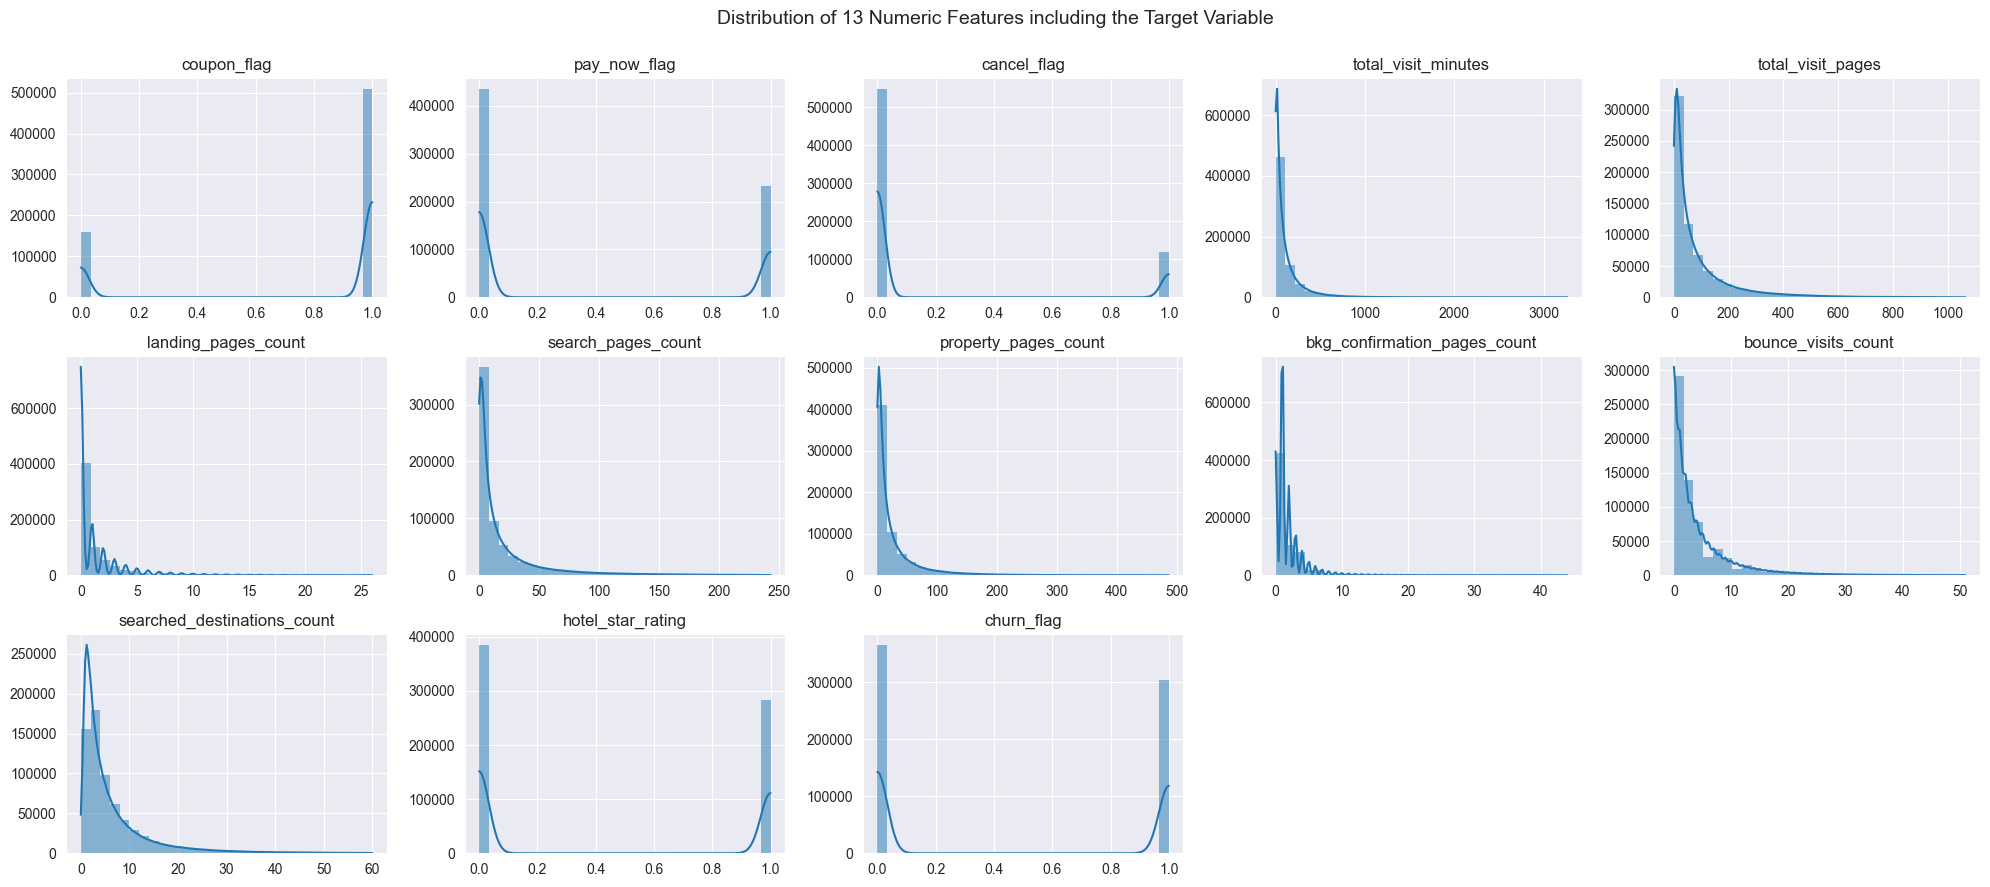

In [10]:
# Numeric variable distributions
df_num = df.select_dtypes(include = ['int64'])

# Set up Seaborn default style and palette
sns.set_style('darkgrid')

# Define the number of columns and rows for the subplots
ncols = 5
nrows = (len(df_num.columns) + ncols - 1) // ncols

# Create subplots
fig, axes = plt.subplots(nrows, ncols, figsize = (ncols * 4, nrows * 3))
axes = axes.flatten()

# Plot histograms with density for numeric variables
for i, column in enumerate(df_num.columns):
    sns.histplot(df_num[column], kde = True, ax = axes[i], edgecolor = 'None', bins = 30)
    axes[i].set_title(column, fontsize = 12)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout and show the plot
plt.suptitle(f'Distribution of {len(df_num.columns)} Numeric Features including the Target Variable', fontsize = 14)
plt.tight_layout(rect=[0, 0, 1, 0.98])

# Show the plot
plt.show()

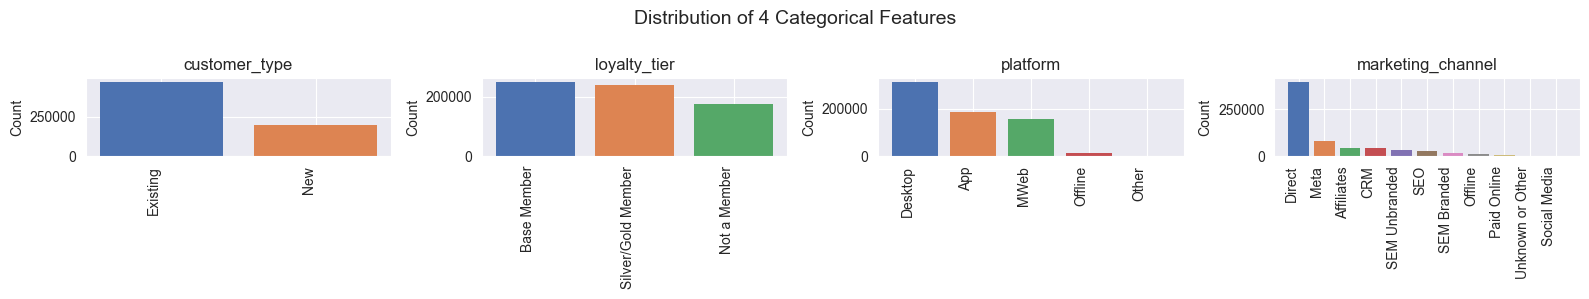

In [11]:
# Categorical variable distributions
df_cat = df.select_dtypes(include = ['object']).drop(columns = ['email_address', 'booking_id'], errors = 'ignore') 

# Set up Seaborn default style and palette
sns.set_style('darkgrid')

# Define the number of columns and rows for the subplots
ncols = 4
nrows = (len(df_cat.columns) + ncols - 1) // ncols

# Create subplots
fig, axes = plt.subplots(nrows, ncols, figsize = (ncols * 4, nrows * 3))
axes = axes.flatten()

# Define a color palette
palette = sns.color_palette('deep')

# Plot each categorical variable
for i, column in enumerate(df_cat.columns):
    counts = df_cat[column].value_counts()
    
    # Create a bar plot using a consistent color
    color_map = palette[:len(counts)]
    axes[i].bar(counts.index, counts.values, color = color_map, edgecolor = 'None')
    axes[i].set_title(column, fontsize = 12)

    # Rotate x-axis labels for readability
    axes[i].tick_params(axis = 'x', rotation = 90)
    axes[i].ticklabel_format(style = 'plain', axis = 'y')
    axes[i].set_ylabel('Count')
    
    # Manually adjust alignment after labels are set by the plot
    plt.setp(axes[i].get_xticklabels(), ha = "right")
 
# Hide any unused subplots. We iterate up to the total number of axes generated
for j in range(len(df_cat.columns), len(axes)):
    fig.delaxes(axes[j])


# Adjust layout and show the plot
plt.suptitle(f'Distribution of {len(df_cat.columns)} Categorical Features', fontsize = 14)
plt.tight_layout(rect=[0, 0, 1, 0.98])

# Show the plot
plt.show()

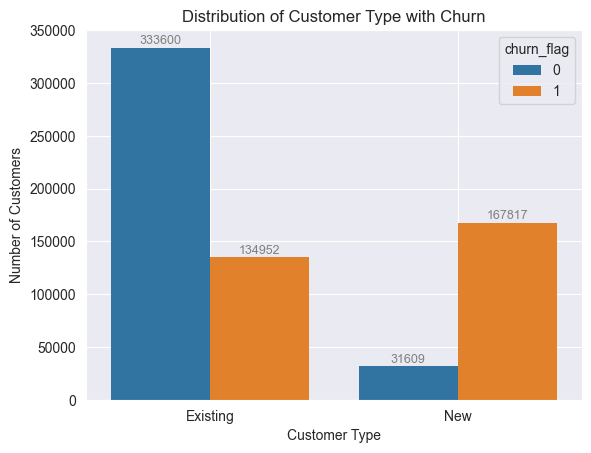

In [12]:
# Distribution of customer type with churn
counts = df.groupby(['customer_type', 'churn_flag']).size().reset_index(name='count')

# Set up Seaborn default style and palette
sns.set_style('darkgrid')

# Create a figure with a single subplot for the bar plot
fig, ax = plt.subplots()

# Create the bar plot
sns.barplot(data = counts, x = 'customer_type', y = 'count', hue = 'churn_flag',
            edgecolor = 'None', ax = ax)

# Customise grid
ax.grid(True, which = 'both')

# Set the titles and labels
ax.set_title('Distribution of Customer Type with Churn')
ax.set_xlabel('Customer Type')
ax.set_ylabel('Number of Customers')

# Annotate each bar with its count value excluding 0% proportions
for p in ax.patches:
    height = int(p.get_height())
    if height > 0:
        ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height), ha = 'center', va = 'center',
                    fontsize = 9, color = 'gray', xytext = (0, 5), textcoords = 'offset points')

# Display the plot
plt.show()

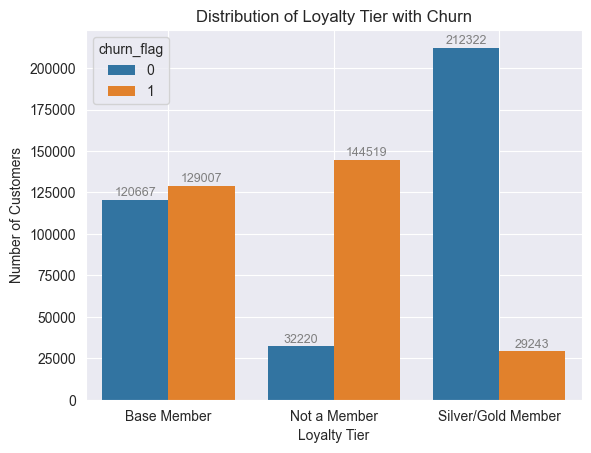

In [13]:
# Distribution of loyalty tier with churn
counts = df.groupby(['loyalty_tier', 'churn_flag']).size().reset_index(name='count')

# Set up Seaborn default style and palette
sns.set_style('darkgrid')

# Create a figure with a single subplot for the bar plot
fig, ax = plt.subplots()

# Create the bar plot
sns.barplot(data = counts, x = 'loyalty_tier', y = 'count', hue = 'churn_flag',
            edgecolor = 'None', ax = ax)

# Customise grid
ax.grid(True, which = 'both')

# Set the titles and labels
ax.set_title('Distribution of Loyalty Tier with Churn')
ax.set_xlabel('Loyalty Tier')
ax.set_ylabel('Number of Customers')

# Annotate each bar with its count value excluding 0% proportions
for p in ax.patches:
    height = int(p.get_height())
    if height > 0:
        ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height), ha = 'center', va = 'center',
                    fontsize = 9, color = 'gray', xytext = (0, 5), textcoords = 'offset points')

# Display the plot
plt.show()

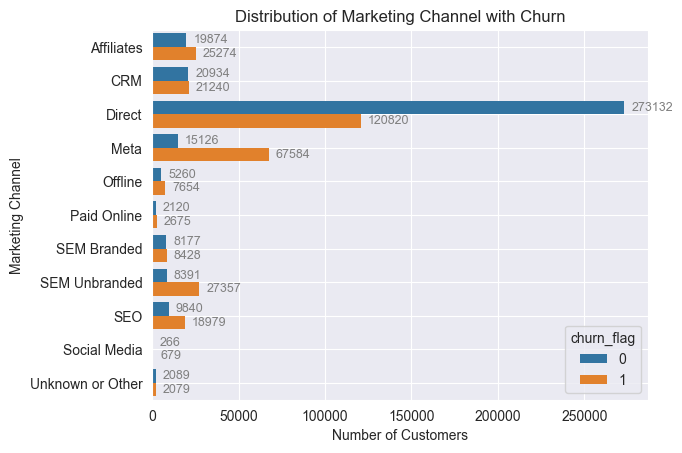

In [14]:
# Distribution of marketing channel with churn
counts = df.groupby(['marketing_channel', 'churn_flag']).size().reset_index(name = 'count')

# Set up Seaborn default style and palette
sns.set_style('darkgrid')
   
# Create a figure with a single subplot for the bar plot
fig, ax = plt.subplots()

# Create a horizontal bar plot (swap x and y)
sns.barplot(data = counts, y = 'marketing_channel', x = 'count', hue = 'churn_flag', hue_order = [0, 1], edgecolor = 'None', ax = ax, orient = 'h')

# Customise grid
ax.grid(True, which = 'both')

# Set the titles and labels
ax.set_title('Distribution of Marketing Channel with Churn')
ax.set_xlabel('Number of Customers')
ax.set_ylabel('Marketing Channel')

# Annotate each bar with its count value
for p in ax.patches:
    width = int(p.get_width())
    if width > 0:
        ax.annotate(f'{width}', (width, p.get_y() + p.get_height() / 2.), 
                    ha='left', va='center', fontsize=9, color='gray', 
                    xytext=(5, 0), textcoords='offset points')

# Display the plot
plt.show()

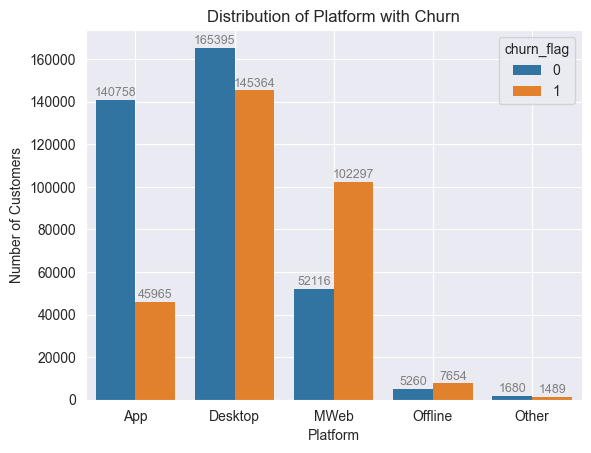

In [15]:
# Distribution of platform with churn
counts = df.groupby(['platform', 'churn_flag']).size().reset_index(name = 'count')

# Set up Seaborn default style and palette
sns.set_style('darkgrid')
   
# Create a figure with a single subplot for the bar plot
fig, ax = plt.subplots()

# Create the bar plot
sns.barplot(data = counts, x = 'platform', y = 'count', hue = 'churn_flag', hue_order = [0, 1], edgecolor = 'None', ax = ax)

# Customise grid
ax.grid(True, which = 'both')

# Set the titles and labels
ax.set_title('Distribution of Platform with Churn')
ax.set_xlabel('Platform')
ax.set_ylabel('Number of Customers')

# Annotate each bar with its count value excluding 0% proportions
for p in ax.patches:
    height = int(p.get_height())
    if height > 0:
        ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height), ha = 'center', va = 'center',
                    fontsize = 9, color = 'gray', xytext = (0, 5), textcoords = 'offset points')

# Display the plot
plt.show()

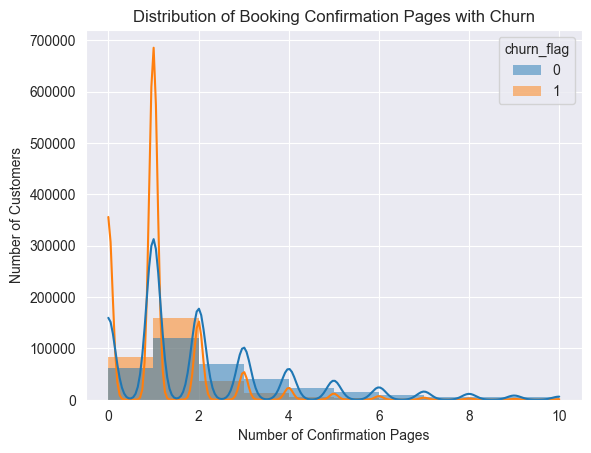

In [16]:
# Distribution of bkg_confirmation_pages_count with churn
counts = df.groupby(['bkg_confirmation_pages_count', 'churn_flag']).size().reset_index(name = 'count')

# Set Seaborn style
sns.set_style('darkgrid')

# Create the histogram
plt.figure()
sns.histplot(data = df[df['bkg_confirmation_pages_count'] <= 10], x = 'bkg_confirmation_pages_count', hue = 'churn_flag', multiple = 'layer', kde = True, bins = 10, edgecolor = 'None')

# Set titles and labels
plt.title('Distribution of Booking Confirmation Pages with Churn')
plt.xlabel('Number of Confirmation Pages')
plt.ylabel('Number of Customers')

# Display the plot
plt.show()

In [17]:
# Drop columns that are not needed for modeling
df = df.drop(columns = ['cancel_date'])

# Encoding categorical variables
categorical_cols_to_encode = ['customer_type', 'loyalty_tier', 'platform', 'marketing_channel']

# Perform one-hot encoding on the booking-level data
df = pd.get_dummies(df, columns = categorical_cols_to_encode, prefix = categorical_cols_to_encode, drop_first = False, dtype = 'int64')

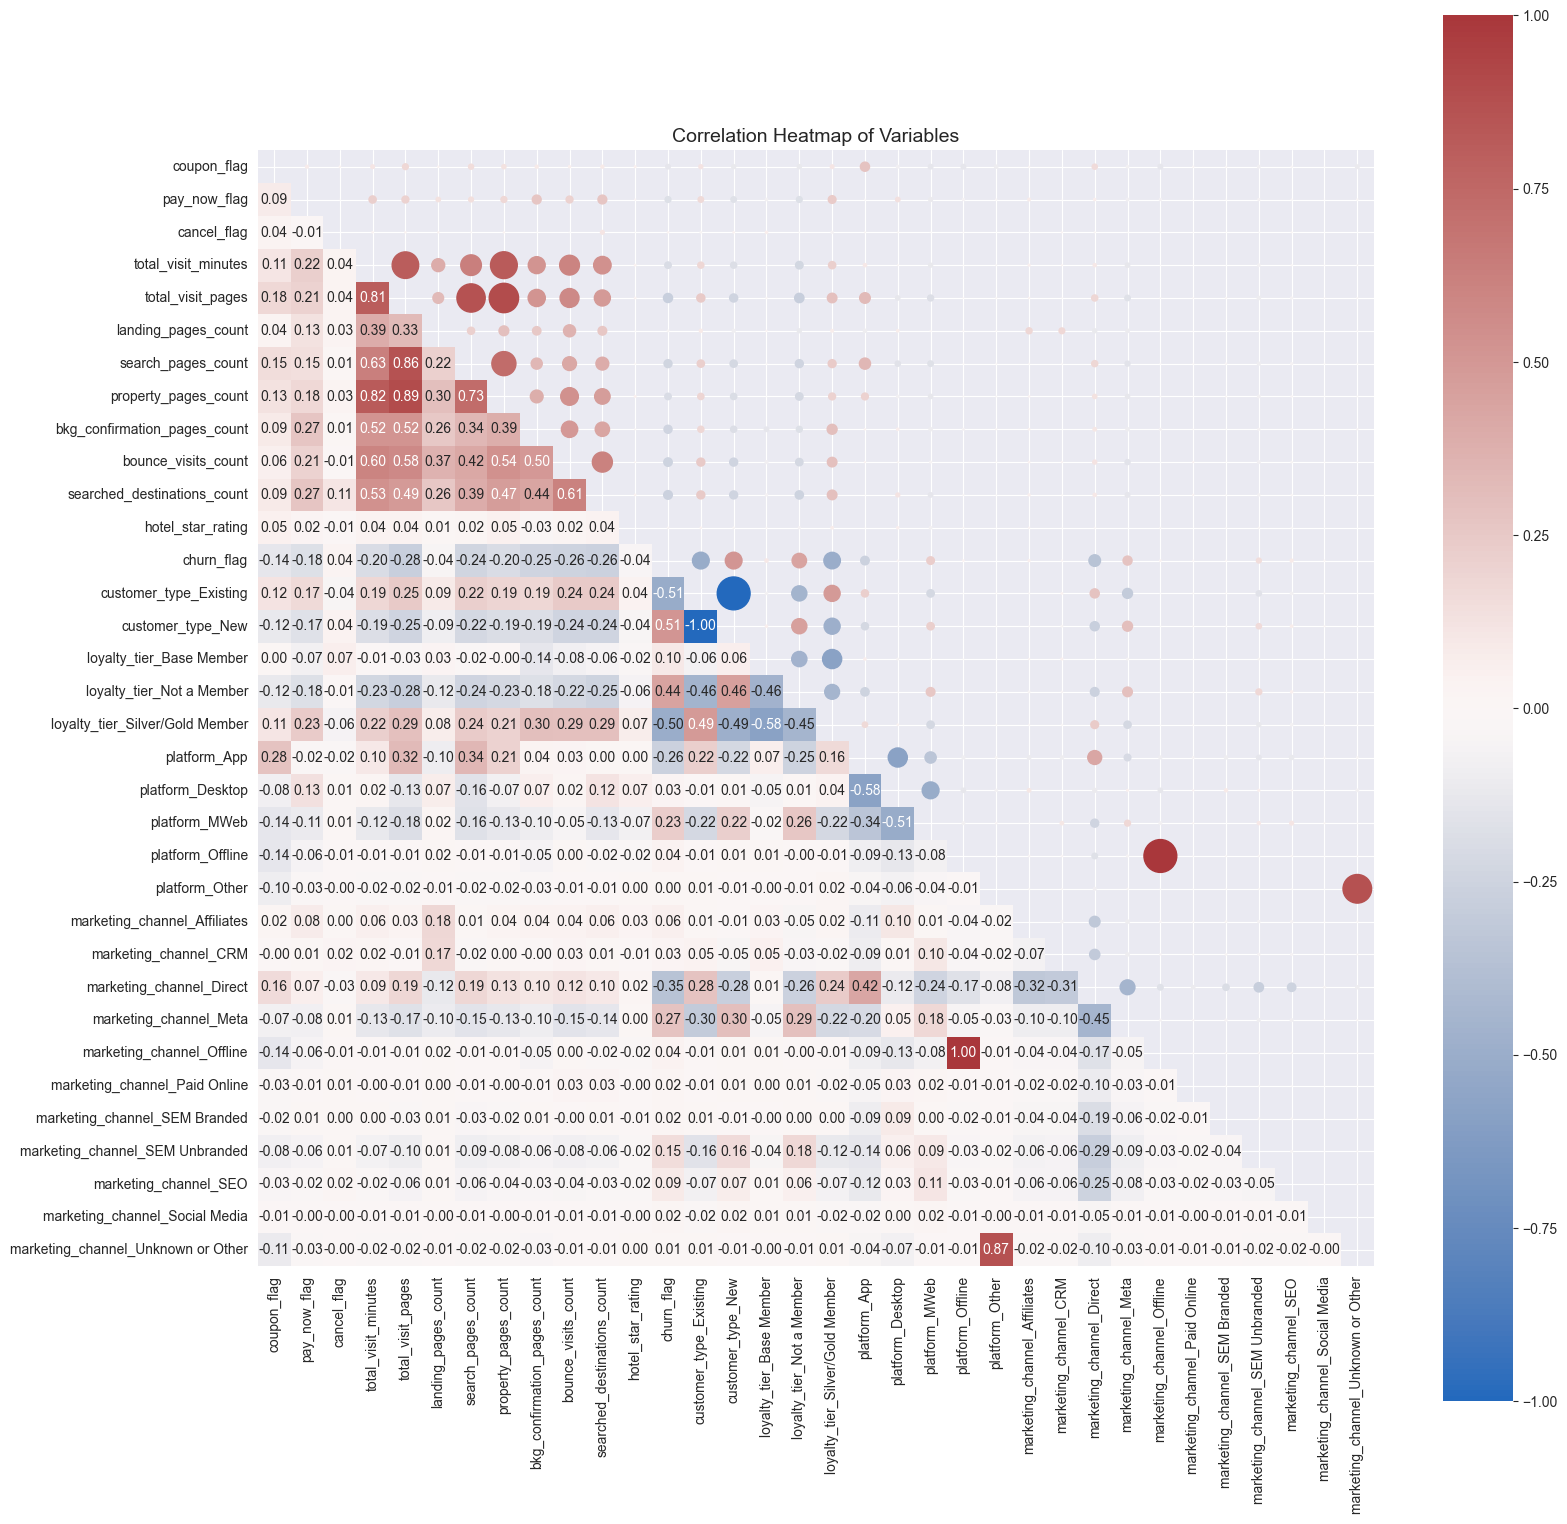

In [18]:
# Check correlations between variables
df_numeric = df.select_dtypes(include = np.number).columns

# Calculate correlations using numeric columns only
correlation_df = df[df_numeric].corr()

# Set up Seaborn default style and palette
sns.set_style('darkgrid')

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_df, dtype = bool))

# Plot the correlation heatmap for the lower triangle
plt.figure(figsize = (18, 18))
sns.heatmap(data=correlation_df, mask = mask, vmin = -1, vmax = 1, annot = True, cmap = 'vlag', fmt = '.2f')

# Get the colormap and normalisation
cmap = plt.get_cmap('vlag')
norm = plt.Normalize(-1, 1)  # Normalise based on the correlation range

# Overlay circles on the upper triangle
for i in range(len(correlation_df.columns)):
    for j in range(i + 1, len(correlation_df.columns)):
        # Get the correlation value
        corr_val = correlation_df.iloc[i, j]
        # Define the circle's radius based on the correlation value
        radius = abs(corr_val) * 0.5  # Adjust multiplier for better scaling
        # Get the color from the colormap
        color = cmap(norm(corr_val))  # Get RGBA color
        # Calculate circle position
        x, y = j + 0.5, i + 0.5
        # Plot circle
        plt.gca().add_patch(plt.Circle((x, y), radius, color = color))

# Ensure aspect ratio is equal to make circles appear round
plt.gca().set_aspect('equal', 'box')

# Set the title
plt.title('Correlation Heatmap of Variables', fontsize = 14)

# Display the plot
plt.show()

In [19]:
# Define the target variable (churn_flag) based on the customer's latest booking
latest_booking_idx = df.groupby('email_address')['bk_date'].idxmax()
customer_df = df.loc[latest_booking_idx, ['email_address', 'churn_flag']].copy()
customer_df = customer_df.set_index('email_address')

# Define aggregation functions for creating customer-level features
agg_funcs = {
    'total_visit_minutes': ['mean', 'sum'],
    'total_visit_pages': ['mean', 'sum'],
    'landing_pages_count': 'sum',
    'search_pages_count': 'sum',
    'property_pages_count': 'sum',
    'bkg_confirmation_pages_count': 'sum',
    'bounce_visits_count': 'sum',
    'coupon_flag': 'sum',        
    'pay_now_flag': 'sum',       
    'cancel_flag': 'sum',        
    'searched_destinations_count': 'max',
    'hotel_star_rating': 'mean', 
    'bk_date': 'count'
}

# Add all one-hot encoded dummy columns to the aggregation dictionary, using 'sum'.
predefined_cols = set(agg_funcs.keys())
all_numeric_cols = set(df.select_dtypes(include = np.number).columns) - {'churn_flag'}
dummy_cols_to_sum = list(all_numeric_cols - predefined_cols)
agg_funcs_dummy = {col: 'sum' for col in dummy_cols_to_sum}
agg_funcs.update(agg_funcs_dummy)

# Apply aggregation
aggregated_features = df.groupby('email_address').agg(agg_funcs)

# Flatten column names 
new_cols = []
for col in aggregated_features.columns.values:
    if col[1] == '':
        new_cols.append(col[0]) 
    elif col[1] == 'count':
        new_cols.append('num_bookings') 
    else:
        new_cols.append('_'.join(col).strip())

# Assign the new column names
aggregated_features.columns = new_cols

# Merge target variable (churn_flag) back into the feature set
final_df = aggregated_features.merge(customer_df, left_index = True, right_index = True).reset_index(drop = True)

In [20]:
# Purchase/cancellation rates
final_df['coupon_rate'] = final_df['coupon_flag_sum'] / final_df['num_bookings']
final_df['pay_now_rate'] = final_df['pay_now_flag_sum'] / final_df['num_bookings']
final_df['cancel_rate'] = final_df['cancel_flag_sum'] / final_df['num_bookings']

# Site efficiency and search behavior
final_df['avg_page_time'] = final_df['total_visit_minutes_sum'] / final_df['total_visit_pages_sum'].replace(0, np.nan)
final_df['search_to_booking_ratio'] = final_df['search_pages_count_sum'] / final_df['bkg_confirmation_pages_count_sum'].replace(0, np.nan)

# Frustration and engagement ratios
final_df['bounce_rate'] = final_df['bounce_visits_count_sum'] / final_df['num_bookings']
final_df['search_intensity'] = final_df['search_pages_count_sum'] / final_df['total_visit_pages_sum'].replace(0, np.nan)

# Clean up NaN values created by division (replace with 0)
final_df = final_df.replace([np.inf, -np.inf, np.nan], 0)

# Constructing Stage

During the constructing stage, various machine learning models were evaluated to identify the best approach for predicting customer churn.

## Model selection

Given the binary nature of the target variable (churned versus not churned), several classification algorithms were considered for modeling customer churn. The models evaluated include Logistic Regression, Decision Tree, Random Forest, and XGBoost. Each model was assessed based on its performance metrics, interpretability, and computational efficiency to determine the most suitable approach for predicting customer churn.

In [21]:
# Feature train-test split
X = final_df.drop('churn_flag', axis = 1)
y = final_df['churn_flag']

# Split the data into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

### Logistic Regression Model

In [22]:
# Logistic Regression model
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

# Identify non-binary columns (those with more than 2 unique values)
non_binary_cols = X.nunique()[X.nunique() > 2].index.tolist()

# Standardise non-binary numeric features
scaler = StandardScaler()

# Fit scaler on training data ONLY and transform the training data (prevents data leakage)
X_train[non_binary_cols] = scaler.fit_transform(X_train[non_binary_cols])

# Transform the test data using the parameters learned from the training data
X_test[non_binary_cols] = scaler.transform(X_test[non_binary_cols])

In [23]:
# Initialize the Logistic Regression model
logistic = LogisticRegression(solver = 'liblinear', max_iter = 1000, random_state = 42)

# Fit the Logistic Regression model to the training data
logistic.fit(X_train_scaled, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'liblinear'
,max_iter,1000
,multi_class,'deprecated'


In [24]:
# Best parameters of the Logistic Regression model
params = logistic.get_params()
formatted = ', '.join(f"{k} = {repr(v)}" for k, v in params.items())
print(formatted)

C = 1.0, class_weight = None, dual = False, fit_intercept = True, intercept_scaling = 1, l1_ratio = None, max_iter = 1000, multi_class = 'deprecated', n_jobs = None, penalty = 'l2', random_state = 42, solver = 'liblinear', tol = 0.0001, verbose = 0, warm_start = False


ROC AUC Score: 0.858

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.77      0.79     65898
           1       0.76      0.78      0.77     59961

    accuracy                           0.78    125859
   macro avg       0.78      0.78      0.78    125859
weighted avg       0.78      0.78      0.78    125859



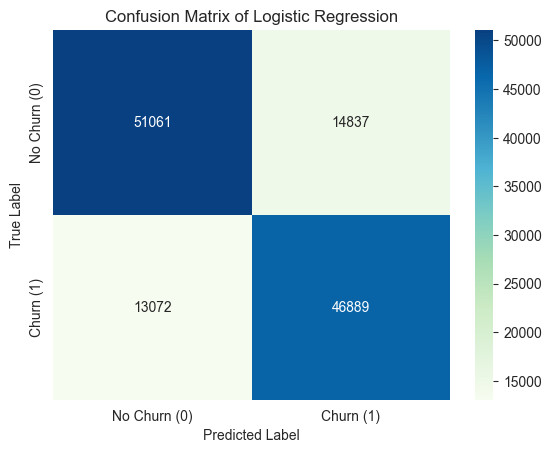

In [25]:
# Logistic Regression model evaluation
y_pred = logistic.predict(X_test)
y_prob = logistic.predict_proba(X_test)[:, 1]

# Report model performance
print(f'ROC AUC Score: {roc_auc_score(y_test, y_prob):.3f}')
print()
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Compute and Plot Confusion Matrix
confusion = confusion_matrix(y_test, y_pred, labels = logistic.classes_)

# Plot confusion matrix
plt.figure()
sns.heatmap(confusion, annot = True, cmap = 'GnBu', fmt = 'd', xticklabels = ['No Churn (0)', 'Churn (1)'], yticklabels = ['No Churn (0)', 'Churn (1)'])
plt.title('Confusion Matrix of Logistic Regression')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Display the plot
plt.show()

Top 10 Most Influential Factors on Churn by Coefficient Magnitude for Logistic Regression Model:
                                     Coefficient
loyalty_tier_Not a Member_sum           1.015602
loyalty_tier_Silver/Gold Member_sum    -0.920002
customer_type_New_sum                   0.817832
marketing_channel_Direct_sum           -0.680318
search_intensity                       -0.598496
customer_type_Existing_sum             -0.516183
marketing_channel_Affiliates_sum        0.438632
marketing_channel_Meta_sum              0.381890
num_bookings                            0.301649
platform_MWeb_sum                       0.228698


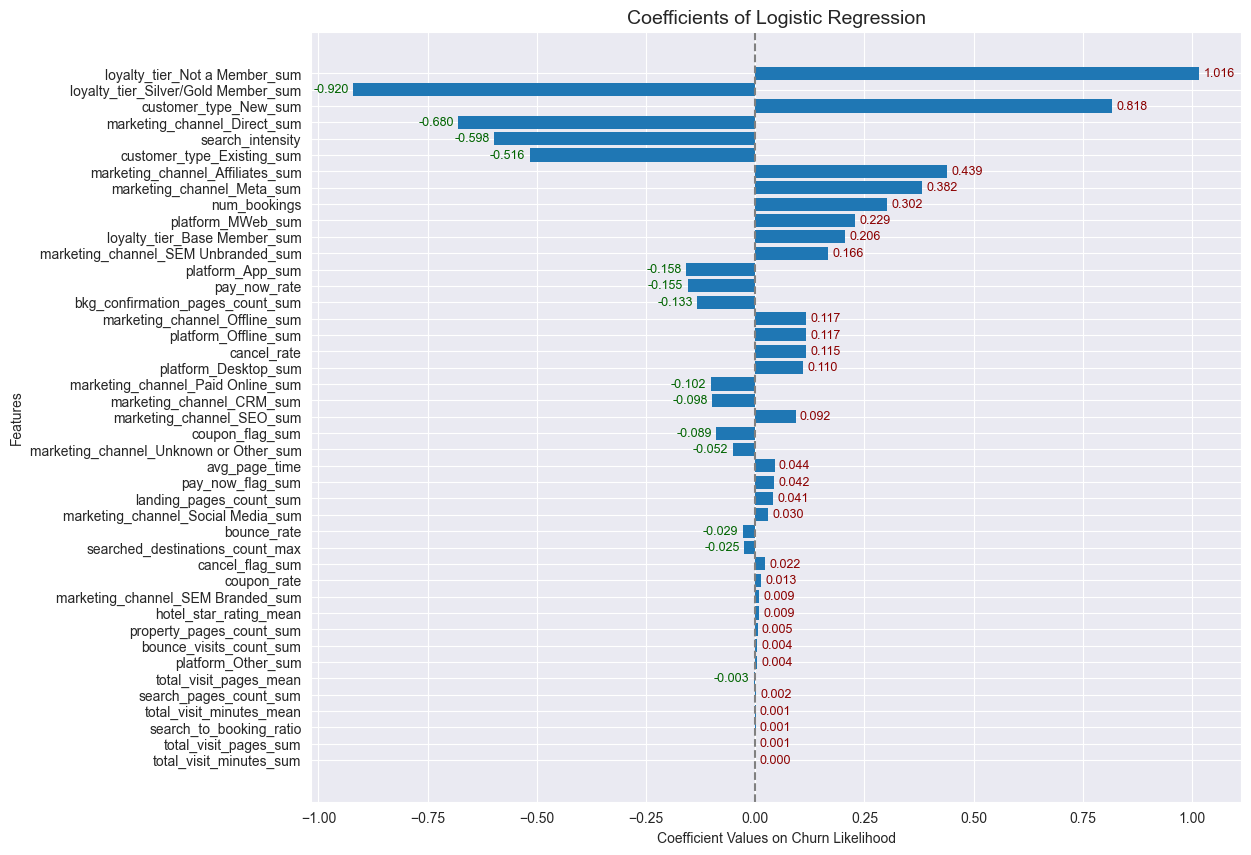

In [26]:
# Coefficients of Logistic Regression
feature_names = X_train.columns

# Get the coefficients of the model
coefficients = logistic.coef_[0]

# Convert coefficients to a Series for easier indexing and sorting
coefficients_series = pd.Series(coefficients, index=feature_names)

# Sort coefficients by absolute value to find most influential factors
coefficients_sorted = coefficients_series.abs().sort_values(ascending=False)

# Display the top features with their actual coefficient value
# Positive Coefficient: Increases the likelihood of churn (bad for business)
# Negative Coefficient: Decreases the likelihood of churn (good for retention)
print('Top 10 Most Influential Factors on Churn by Coefficient Magnitude for Logistic Regression Model:')
top_10_coefficients = coefficients_series.loc[coefficients_sorted.head(10).index].to_frame('Coefficient')
print(top_10_coefficients)

# Create a DataFrame to store feature names and coefficients
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort the coefficients by absolute value for better visualisation (ascending for barh plot)
coef_df['Absolute coefficient'] = coef_df['Coefficient'].abs()
# Sort ascending so the most influential bars are at the top of the horizontal plot
coef_df = coef_df.sort_values(by = 'Absolute coefficient', ascending = True).reset_index(drop = True)

# Set up Seaborn default style and palette
sns.set_style('darkgrid')

# Plot the coefficients
plt.figure(figsize = (12, 10))
bars = plt.barh(coef_df['Feature'], coef_df['Coefficient'], edgecolor = 'None')

# Set the title and labels
plt.title('Coefficients of Logistic Regression', fontsize = 14)
plt.xlabel('Coefficient Values on Churn Likelihood')
plt.ylabel('Features')

# Add a vertical line at 0 for visual separation
plt.axvline(0, color = 'gray', linestyle = '--')

# Annotate each bar with its coefficient value
for bar, coef in zip(bars, coef_df['Coefficient']):
    if coef != 0:
        # Determine colour and alignment based on coefficient sign
        text_color = 'darkred' if coef > 0 else 'darkgreen'
        text_align = 'left' if coef > 0 else 'right'
        
        # Adjust horizontal position slightly based on sign
        x_pos = bar.get_width() + 0.01 if coef > 0 else bar.get_width() - 0.01
        
        # Annotate the bar
        plt.text(x_pos, bar.get_y() + bar.get_height()/2, f'{coef:.3f}', ha = text_align, va = 'center', fontsize = 9, color = text_color)

# Show the plot
plt.show()

### Decision Tree Model

In [27]:
# Decision Tree model
tree_classifier = DecisionTreeClassifier(random_state = 42)

# Create a dictionary of hyperparameters to tune for the model
params = {'max_depth': [3, 5, 10],
          'min_samples_leaf': [5, 10, 20],
          'min_samples_split': [10, 20, 30]}

# Define scoring metrics
metrics = {'accuracy': make_scorer(accuracy_score), 
           'precision': make_scorer(precision_score),
           'recall': make_scorer(recall_score), 
           'f1': make_scorer(f1_score),
           'roc_auc': make_scorer(roc_auc_score)}

# Instantiate GridSearch
tree = GridSearchCV(estimator = tree_classifier, param_grid = params, scoring = metrics, cv = 4, refit = 'roc_auc', n_jobs = -1,)

# Fit the model to the training data
tree.fit(X_train, y_train)

,estimator,DecisionTreeC...ndom_state=42)
,param_grid,"{'max_depth': [3, 5, ...], 'min_samples_leaf': [5, 10, ...], 'min_samples_split': [10, 20, ...]}"
,scoring,"{'accuracy': make_scorer(a...hod='predict'), 'f1': make_scorer(f...hod='predict'), 'precision': make_scorer(p...hod='predict'), 'recall': make_scorer(r...hod='predict'), ...}"
,n_jobs,-1
,refit,'roc_auc'
,cv,4
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'gini'


In [28]:
# Best parameters of the Decision Tree model
best_tree = tree.best_estimator_
print(best_tree)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=20, min_samples_split=10,
                       random_state=42)


ROC AUC Score: 0.867

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.83      0.80     65898
           1       0.80      0.74      0.77     59961

    accuracy                           0.79    125859
   macro avg       0.79      0.79      0.79    125859
weighted avg       0.79      0.79      0.79    125859



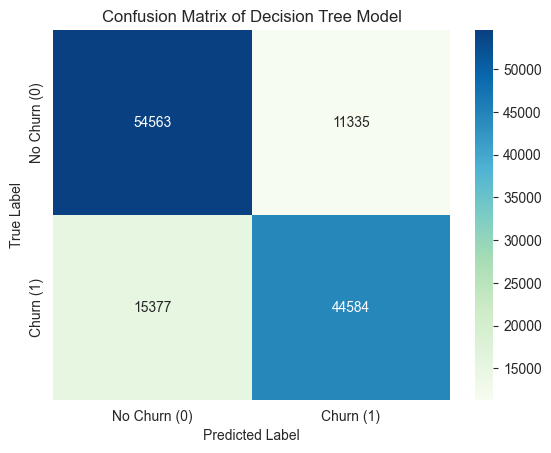

In [29]:
# Decision Tree model evaluation
y_pred = tree.predict(X_test)
y_prob = tree.predict_proba(X_test)[:, 1]

# Report model performance
print(f'ROC AUC Score: {roc_auc_score(y_test, y_prob):.3f}')
print()
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Compute and Plot Confusion Matrix
confusion = confusion_matrix(y_test, y_pred, labels = logistic.classes_)

# Plot confusion matrix
plt.figure()
sns.heatmap(confusion, annot = True, cmap = 'GnBu', fmt = 'd', xticklabels = ['No Churn (0)', 'Churn (1)'], yticklabels = ['No Churn (0)', 'Churn (1)'])
plt.title('Confusion Matrix of Decision Tree Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Display the plot
plt.show()

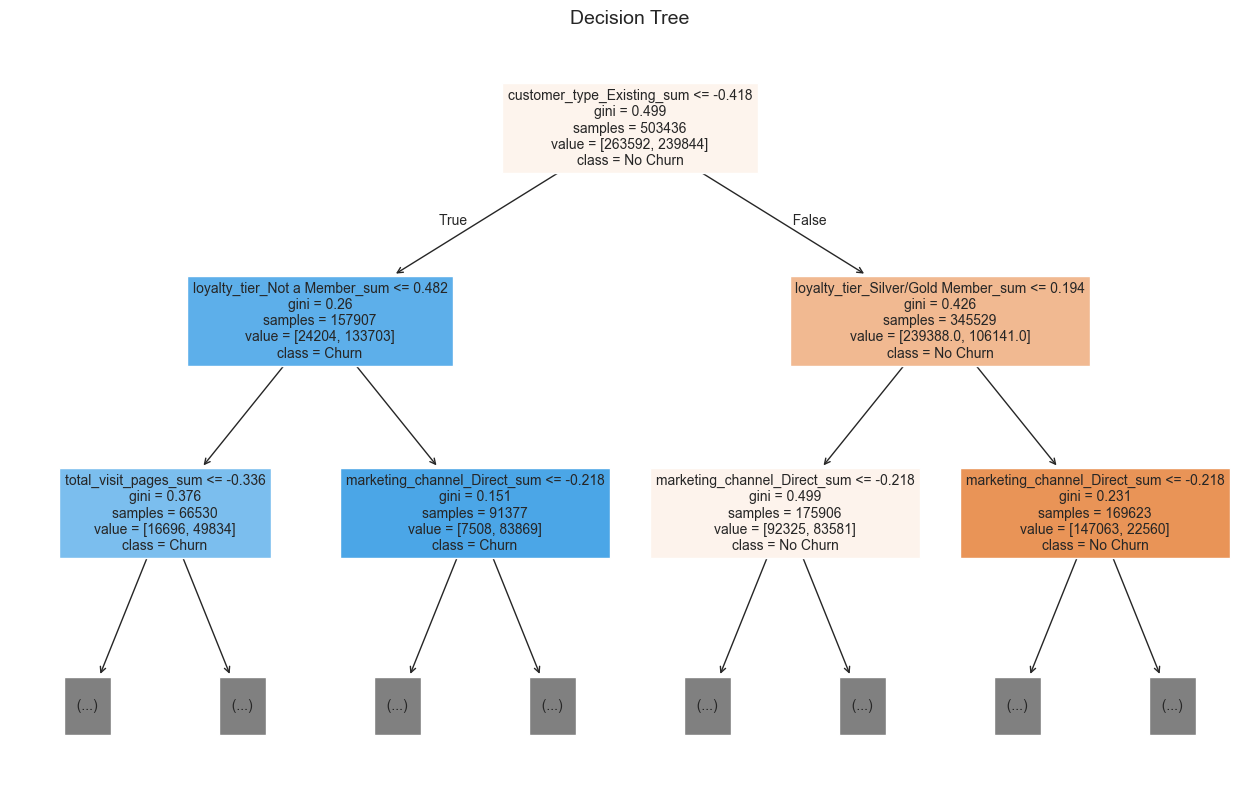

In [30]:
# Plot the Decision Tree
plt.figure(figsize = (16, 10))
plot_tree(best_tree, max_depth = 2, fontsize = 10, feature_names = X_train.columns.tolist(), class_names = ['No Churn', 'Churn'], filled = True)
plt.title('Decision Tree', fontsize = 14)

# Display the plot
plt.show()

Top 10 Most Influential Factors on Churn by Gini Importance for Decision Tree Model:
                                     gini_importance
customer_type_Existing_sum                  0.593722
loyalty_tier_Silver/Gold Member_sum         0.190320
marketing_channel_Direct_sum                0.085609
loyalty_tier_Base Member_sum                0.026154
loyalty_tier_Not a Member_sum               0.020642
bkg_confirmation_pages_count_sum            0.018339
total_visit_pages_sum                       0.011637
searched_destinations_count_max             0.009422
avg_page_time                               0.007863
total_visit_pages_mean                      0.005643


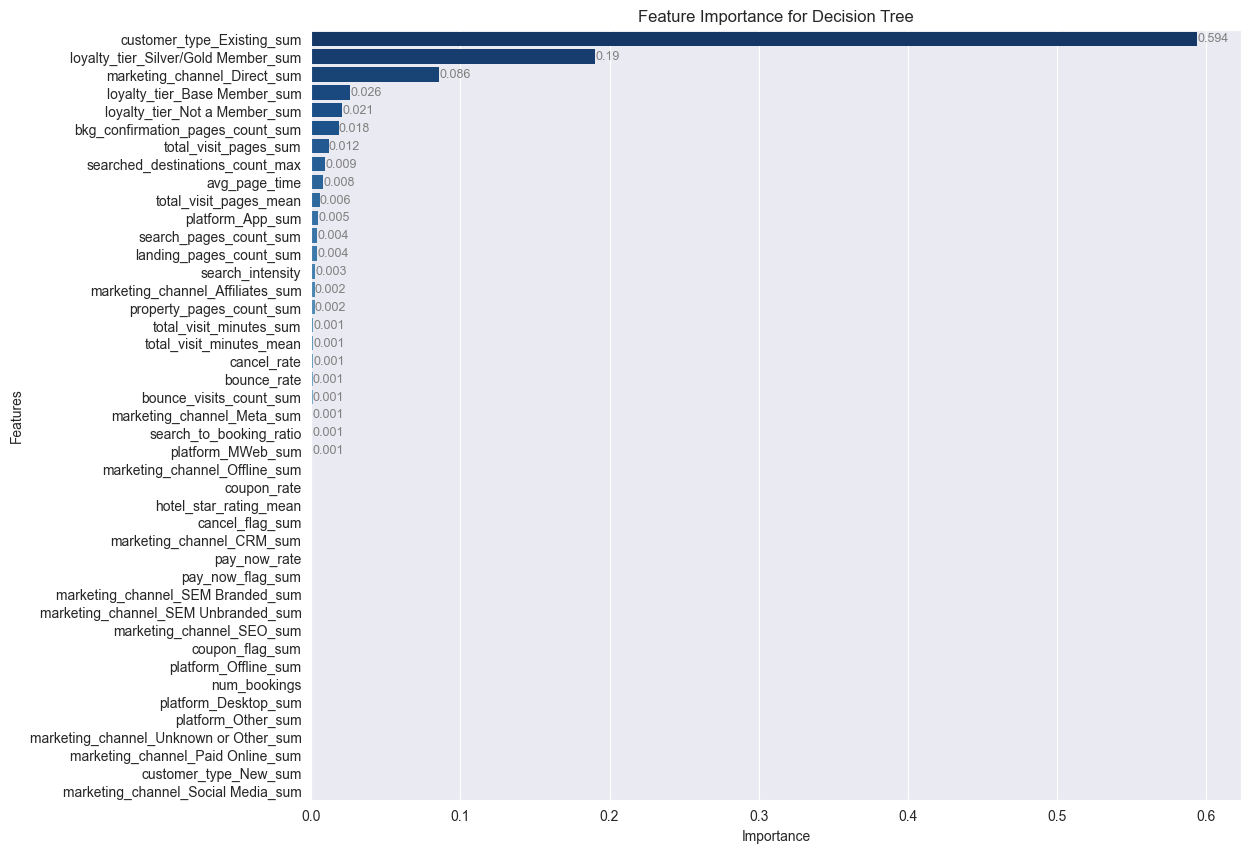

In [31]:
# Feature importance for Decision Tree
feature_importance = pd.Series(best_tree.feature_importances_, index = X.columns)

# Create a DataFrame to hold the importances, with feature names as index
importance = pd.DataFrame(feature_importance, columns = ['gini_importance'], index = X.columns)

# Sort feature importances in descending order
importance_sorted = importance.sort_values(by = 'gini_importance', ascending = False)

# Display the top features with their importance value
print('Top 10 Most Influential Factors on Churn by Gini Importance for Decision Tree Model:')
top_10_coefficients = importance.sort_values(by = 'gini_importance', ascending = False).head(10)
print(top_10_coefficients)

# Set up Seaborn default style and palette
sns.set_style('darkgrid')

# Plot the feature importance
plt.figure(figsize = (12, 10))
sns.barplot(x = 'gini_importance', y = importance_sorted.index, data = importance_sorted,
            hue = importance_sorted.index, orient = 'h', edgecolor = 'None', palette = 'Blues_r')
plt.title('Feature Importance for Decision Tree')
plt.xlabel('Importance')
plt.ylabel('Features')

# Annotate each bar with its importance value
for i in range(len(importance_sorted)):
    importance = round(importance_sorted['gini_importance'].iloc[i], 3)
    if importance > 0:
        x_pos = importance_sorted['gini_importance'].iloc[i] + 0.0001
        plt.text(x_pos, i, importance, ha = 'left', va = 'center', fontsize = 9, color = 'gray')

# Display the plot
plt.show()

### Random Forest Model

In [32]:
# Random Forest model
forest_classifier = RandomForestClassifier(n_estimators = 50, random_state = 42)

# Create a dictionary of hyperparameters to tune for the model
params = {'max_depth': [5, 10, 15],
          'max_features': [0.3, 0.5, 0.8],
          'min_samples_leaf': [5, 10, 20],
          'min_samples_split': [10, 20, 30]}

# Instantiate RandomizedSearch
forest = RandomizedSearchCV(estimator = forest_classifier, param_distributions = params, n_iter = 10, scoring = 'roc_auc', cv = 4, n_jobs = -1, random_state = 42)

# Fit the base Random Forest model directly to the training data
forest.fit(X_train, y_train)

,estimator,RandomForestC...ndom_state=42)
,param_distributions,"{'max_depth': [5, 10, ...], 'max_features': [0.3, 0.5, ...], 'min_samples_leaf': [5, 10, ...], 'min_samples_split': [10, 20, ...]}"
,n_iter,10
,scoring,'roc_auc'
,n_jobs,-1
,refit,True
,cv,4
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [33]:
# Best parameters of the Random Forest model
best_forest = forest.best_estimator_
print(best_forest)

RandomForestClassifier(max_depth=15, max_features=0.5, min_samples_leaf=20,
                       min_samples_split=20, n_estimators=50, random_state=42)


ROC AUC Score: 0.872

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.83      0.81     65898
           1       0.80      0.75      0.77     59961

    accuracy                           0.79    125859
   macro avg       0.79      0.79      0.79    125859
weighted avg       0.79      0.79      0.79    125859



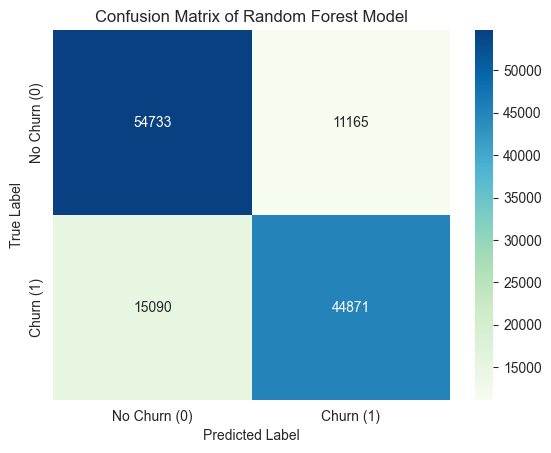

In [34]:
# Random Forest model evaluation
y_pred = forest.predict(X_test)
y_prob = forest.predict_proba(X_test)[:, 1]

# Report model performance
print(f'ROC AUC Score: {roc_auc_score(y_test, y_prob):.3f}')
print()
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Compute and Plot Confusion Matrix
confusion = confusion_matrix(y_test, y_pred, labels = logistic.classes_)

# Plot confusion matrix
plt.figure()
sns.heatmap(confusion, annot = True, cmap = 'GnBu', fmt = 'd', xticklabels = ['No Churn (0)', 'Churn (1)'], yticklabels = ['No Churn (0)', 'Churn (1)'])
plt.title('Confusion Matrix of Random Forest Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Display the plot
plt.show()

Top 10 Most Influential Factors on Churn by Gini Importance for Random Forest Model:
                                     gini_importance
customer_type_Existing_sum                  0.282381
loyalty_tier_Silver/Gold Member_sum         0.200166
customer_type_New_sum                       0.121633
loyalty_tier_Not a Member_sum               0.086373
marketing_channel_Direct_sum                0.083085
total_visit_pages_sum                       0.028937
loyalty_tier_Base Member_sum                0.024421
avg_page_time                               0.017842
total_visit_pages_mean                      0.017625
searched_destinations_count_max             0.015363


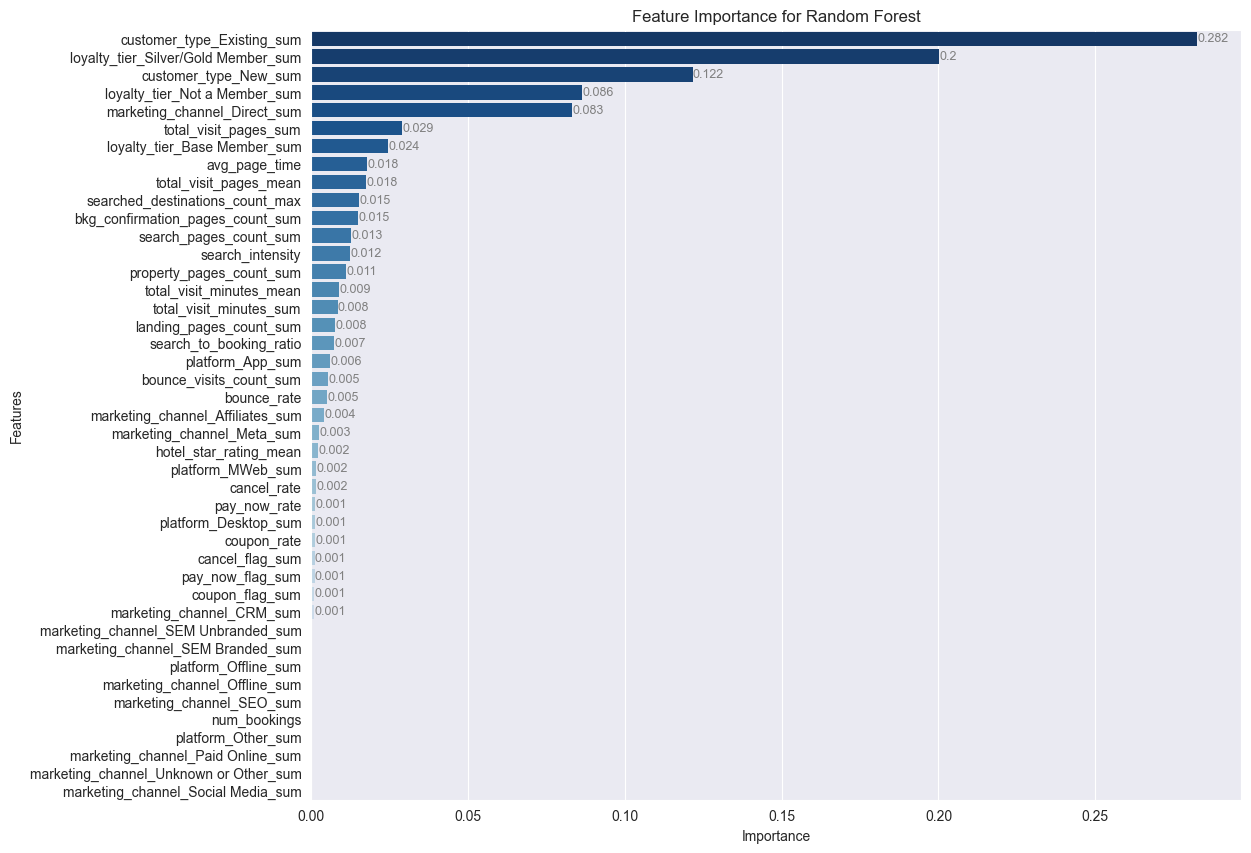

In [35]:
# Feature importance for Random Forest
feature_importance = pd.Series(best_forest.feature_importances_, index = X.columns)

# Create a DataFrame to hold the importances, with feature names as index
importance = pd.DataFrame(feature_importance, columns = ['gini_importance'], index = X.columns)

# Sort feature importances in descending order
importance_sorted = importance.sort_values(by = 'gini_importance', ascending = False)

# Display the top features with their importance value
print('Top 10 Most Influential Factors on Churn by Gini Importance for Random Forest Model:')
top_10_coefficients = importance.sort_values(by = 'gini_importance', ascending = False).head(10)
print(top_10_coefficients)

# Set up Seaborn default style and palette
sns.set_style('darkgrid')

# Plot the feature importance
plt.figure(figsize = (12, 10))
sns.barplot(x = 'gini_importance', y = importance_sorted.index, data = importance_sorted,
            hue = importance_sorted.index, orient = 'h', edgecolor = 'None', palette = 'Blues_r')
plt.title('Feature Importance for Random Forest')
plt.xlabel('Importance')
plt.ylabel('Features')

# Annotate each bar with its importance value
for i in range(len(importance_sorted)):
    importance = round(importance_sorted['gini_importance'].iloc[i], 3)
    if importance > 0:
        x_pos = importance_sorted['gini_importance'].iloc[i] + 0.0001
        plt.text(x_pos, i, importance, ha = 'left', va = 'center', fontsize = 9, color = 'gray')

# Display the plot
plt.show()

### XGBoost Model

In [36]:
# XGBoost model
boost_classifier = XGBClassifier(n_estimators = 50, random_state = 42)

# Create a dictionary of hyperparameters to tune for the model
params = {'n_estimators': [50, 100, 150],
          'max_depth': [5, 10, 15],
          'learning_rate': [0.01, 0.05, 0.1],
          'subsample': [0.6, 0.8, 1.0],
          'colsample_bytree': [0.6, 0.8, 1.0],
          'min_child_weight': [3, 5, 10]}

# Instantiate RandomizedSearch
boost = RandomizedSearchCV(estimator = boost_classifier, param_distributions = params, n_iter = 10, scoring = 'roc_auc', cv = 4, n_jobs = -1, random_state = 42)

# Fit the base XGBoost model directly to the training data
boost.fit(X_train, y_train)

,estimator,"XGBClassifier...ree=None, ...)"
,param_distributions,"{'colsample_bytree': [0.6, 0.8, ...], 'learning_rate': [0.01, 0.05, ...], 'max_depth': [5, 10, ...], 'min_child_weight': [3, 5, ...], ...}"
,n_iter,10
,scoring,'roc_auc'
,n_jobs,-1
,refit,True
,cv,4
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [37]:
# Best parameters of the XGBoost model
best_boost = boost.best_estimator_
print(best_boost)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=10,
              max_leaves=None, min_child_weight=10, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=150,
              n_jobs=None, num_parallel_tree=None, ...)


ROC AUC Score: 0.874

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.83      0.81     65898
           1       0.80      0.75      0.77     59961

    accuracy                           0.79    125859
   macro avg       0.79      0.79      0.79    125859
weighted avg       0.79      0.79      0.79    125859



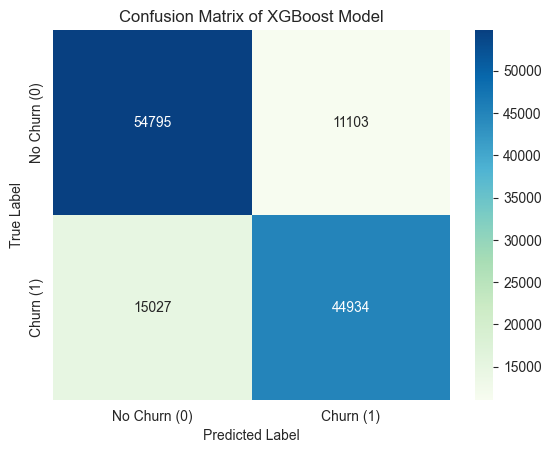

In [38]:
# XGBoost model evaluation
y_pred = boost.predict(X_test)
y_prob = boost.predict_proba(X_test)[:, 1]

# Report model performance
print(f'ROC AUC Score: {roc_auc_score(y_test, y_prob):.3f}')
print()
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Compute and Plot Confusion Matrix
confusion = confusion_matrix(y_test, y_pred, labels = logistic.classes_)

# Plot confusion matrix
plt.figure()
sns.heatmap(confusion, annot = True, cmap = 'GnBu', fmt = 'd', xticklabels = ['No Churn (0)', 'Churn (1)'], yticklabels = ['No Churn (0)', 'Churn (1)'])
plt.title('Confusion Matrix of XGBoost Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Display the plot
plt.show()

Top 10 Most Influential Factors on Churn by Gini Importance for XGBoost Model:
                                     gini_importance
customer_type_Existing_sum                  0.374207
loyalty_tier_Silver/Gold Member_sum         0.263442
customer_type_New_sum                       0.186008
loyalty_tier_Not a Member_sum               0.049755
marketing_channel_Direct_sum                0.044610
loyalty_tier_Base Member_sum                0.029842
platform_App_sum                            0.006548
marketing_channel_Meta_sum                  0.005500
marketing_channel_Affiliates_sum            0.004874
bkg_confirmation_pages_count_sum            0.003226


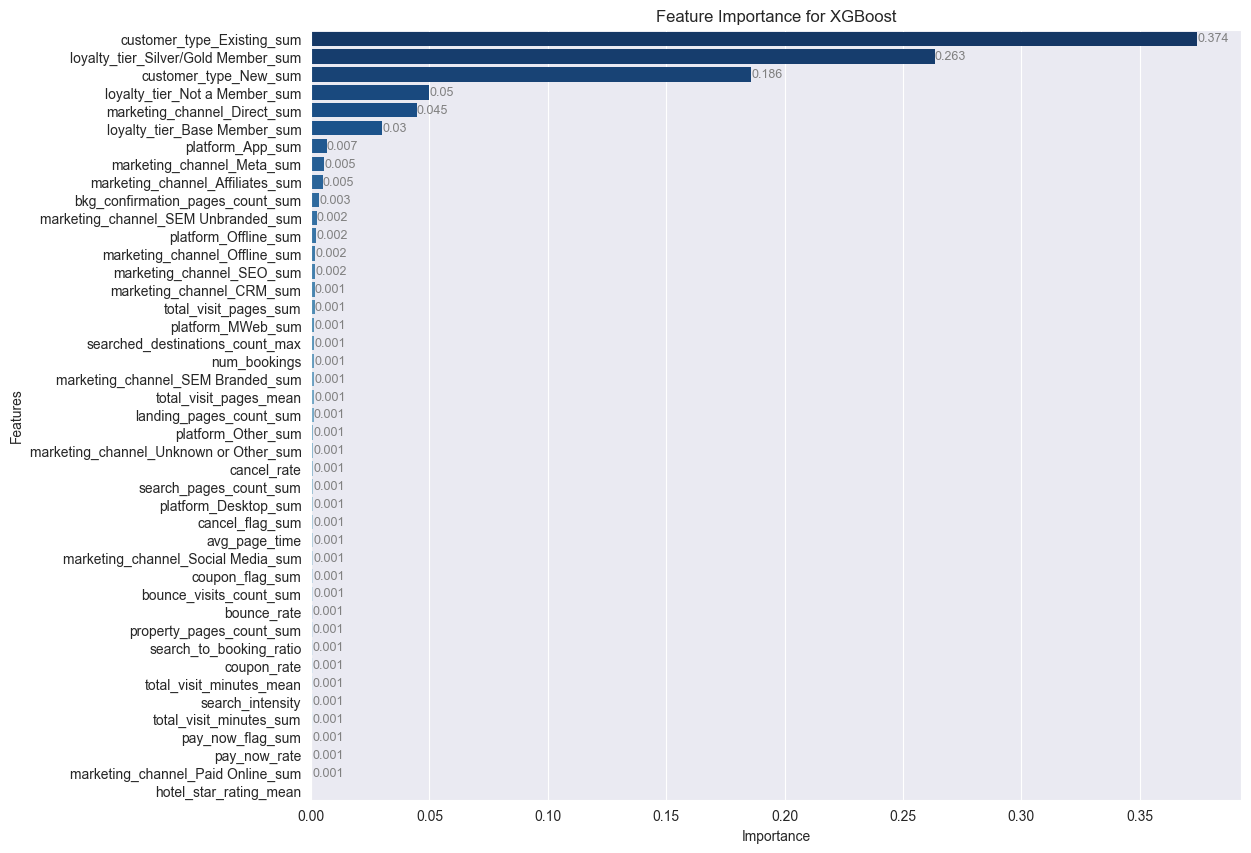

In [39]:
# Feature importance for XGBoost
feature_importance = pd.Series(best_boost.feature_importances_, index = X.columns)

# Create a DataFrame to hold the importances, with feature names as index
importance = pd.DataFrame(feature_importance, columns = ['gini_importance'], index = X.columns)

# Sort feature importances in descending order
importance_sorted = importance.sort_values(by = 'gini_importance', ascending = False)

# Display the top features with their importance value
print('Top 10 Most Influential Factors on Churn by Gini Importance for XGBoost Model:')
top_10_coefficients = importance.sort_values(by = 'gini_importance', ascending = False).head(10)
print(top_10_coefficients)

# Set up Seaborn default style and palette
sns.set_style('darkgrid')

# Plot the feature importance
plt.figure(figsize = (12, 10))
sns.barplot(x = 'gini_importance', y = importance_sorted.index, data = importance_sorted,
            hue = importance_sorted.index, orient = 'h', edgecolor = 'None', palette = 'Blues_r')
plt.title('Feature Importance for XGBoost')
plt.xlabel('Importance')
plt.ylabel('Features')

# Annotate each bar with its importance value
for i in range(len(importance_sorted)):
    importance = round(importance_sorted['gini_importance'].iloc[i], 3)
    if importance > 0:
        x_pos = importance_sorted['gini_importance'].iloc[i] + 0.0001
        plt.text(x_pos, i, importance, ha = 'left', va = 'center', fontsize = 9, color = 'gray')

# Display the plot
plt.show()

# Executing Stage

During the executing stage, every step is carefully documented, including data processing, models construction, analysis, and predictions. The best model is chosen after a thorough evaluation of its performance, while also considering potential biases. Feedback is collected, and adjustments are made as needed to clearly present the results and incorporate recommendations.

## Conclusion

In this project, we successfully developed a predictive model to identify customers at risk of churning from Hotels.com. The XGBoost model demonstrated the best performance with a cross-validated ROC AUC of 0.874, indicating strong predictive capability. Key factors influencing churn were identified, including recency of last stay, booking value, and platform used for booking. These insights provide actionable strategies for Hotels.com to enhance customer retention through targeted marketing campaigns and personalized offers. Future steps include implementing a real-time churn scoring system and conducting further research on high-risk customer segments to refine retention strategies. A churn predictor will be integrated into the CRM system to enable proactive customer engagement and reduce attrition rates.